# EDA and Visuals

#### Libraries and imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Retail store's uncleaned data

In [2]:
raw_data = pd.read_csv("retail_store_sales.csv")
raw_data.sample(n=11)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12187,TXN_8613508,CUST_08,Butchers,Item_7_BUT,14.0,1.0,14.0,Cash,Online,2024-11-24,True
3837,TXN_5471959,CUST_23,Computers and electric accessories,Item_2_CEA,6.5,10.0,65.0,Digital Wallet,In-store,2023-05-18,NaN
9182,TXN_9020000,CUST_09,Electric household essentials,Item_9_EHE,17.0,1.0,17.0,Digital Wallet,Online,2022-02-22,NaN
6452,TXN_2017094,CUST_11,Patisserie,Item_17_PAT,29.0,7.0,203.0,Cash,In-store,2022-02-20,False
9639,TXN_6087379,CUST_24,Milk Products,Item_23_MILK,38.0,9.0,342.0,Cash,Online,2023-04-19,True
3162,TXN_2948826,CUST_05,Electric household essentials,Item_15_EHE,26.0,7.0,182.0,Cash,Online,2024-09-16,True
5693,TXN_2730739,CUST_22,Furniture,Item_21_FUR,35.0,8.0,280.0,Digital Wallet,In-store,2022-02-12,True
11071,TXN_8631297,CUST_23,Butchers,Item_18_BUT,30.5,10.0,305.0,Digital Wallet,Online,2022-02-15,NaN
5804,TXN_5469948,CUST_20,Furniture,Item_6_FUR,12.5,6.0,75.0,Digital Wallet,In-store,2022-09-01,NaN
7631,TXN_2720959,CUST_23,Butchers,Item_7_BUT,14.0,3.0,42.0,Credit Card,Online,2024-10-22,NaN


In [3]:
raw_data_info = raw_data.info()
raw_data_descp = raw_data.describe()
raw_data_columns = raw_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [4]:
print(f"{raw_data_descp}")
print(f"{raw_data_columns}")

       Price Per Unit      Quantity   Total Spent
count    11966.000000  11971.000000  11971.000000
mean        23.365912      5.536380    129.652577
std         10.743519      2.857883     94.750697
min          5.000000      1.000000      5.000000
25%         14.000000      3.000000     51.000000
50%         23.000000      6.000000    108.500000
75%         33.500000      8.000000    192.000000
max         41.000000     10.000000    410.000000
Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')


#### Cleaned and feature enginered Data

In [5]:
visual_data = pd.read_csv("visual_retail_sales_data.csv")
visual_data.sample(n=11)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Year-Month
2929,TXN_5321880,CUST_13,Butchers,Item_20_BUT,33.5,1.0,33.5,Cash,Online,2024-02-25,NaN,2024,2,2024-02
503,TXN_4793201,CUST_12,Beverages,Item_16_BEV,27.5,2.0,55.0,Credit Card,In-store,2023-09-01,True,2023,9,2023-09
4293,TXN_1508098,CUST_17,Electric household essentials,Item_20_EHE,33.5,9.0,301.5,Credit Card,Online,2024-04-25,NaN,2024,4,2024-04
8318,TXN_5482525,CUST_08,Milk Products,Item_3_MILK,8.0,8.0,64.0,Credit Card,Online,2022-08-09,True,2022,8,2022-08
1111,TXN_9555119,CUST_15,Food,Item_8_FOOD,15.5,7.0,108.5,Digital Wallet,Online,2023-03-29,True,2023,3,2023-03
5944,TXN_9185495,CUST_13,Electric household essentials,Item_15_EHE,26.0,1.0,26.0,Digital Wallet,Online,2022-10-22,True,2022,10,2022-10
9759,TXN_6953040,CUST_07,Electric household essentials,Item_5_EHE,11.0,9.0,99.0,Credit Card,In-store,2022-12-07,False,2022,12,2022-12
9190,TXN_8047953,CUST_02,Electric household essentials,Item_9_EHE,17.0,8.0,136.0,Cash,Online,2022-11-07,False,2022,11,2022-11
8668,TXN_9964153,CUST_07,Patisserie,Item_25_PAT,41.0,2.0,82.0,Cash,Online,2023-05-29,False,2023,5,2023-05
8784,TXN_8669054,CUST_24,Milk Products,Item_6_MILK,12.5,7.0,87.5,Digital Wallet,In-store,2022-08-28,NaN,2022,8,2022-08


### Visuals

#### Group by Month and Year for sales trends

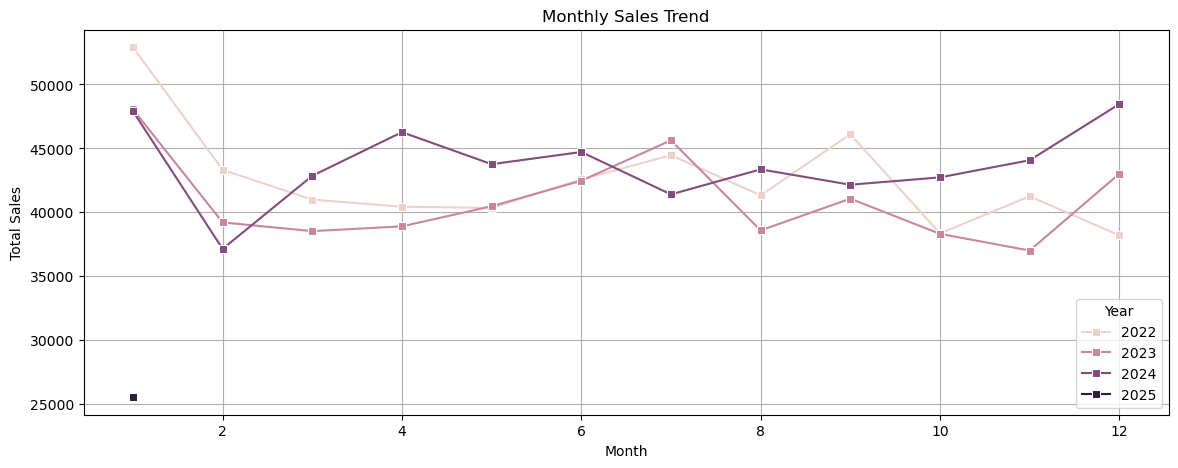

In [6]:
monthly_sales = visual_data.groupby(["Year", "Month"])["Total Spent"].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_sales, x="Month", y="Total Spent", hue="Year", marker="s")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.grid()

- Highest revenus on every year January show more revenu and the December show good revenu of years 2023 and 2024

#### Yearky sales comparion

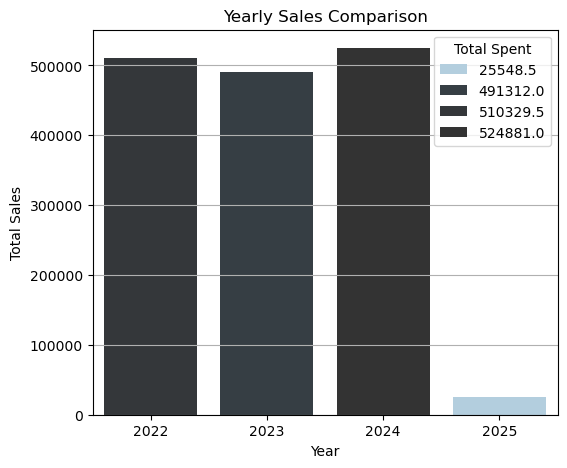

In [7]:
yearly_sales = visual_data.groupby("Year")["Total Spent"].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=yearly_sales, x="Year", y="Total Spent", hue="Total Spent", palette="Blues_d")
plt.title("Yearly Sales Comparison")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(axis="y")
plt.show()

Year 2024 show the highest sales 

#### Total sales per Category

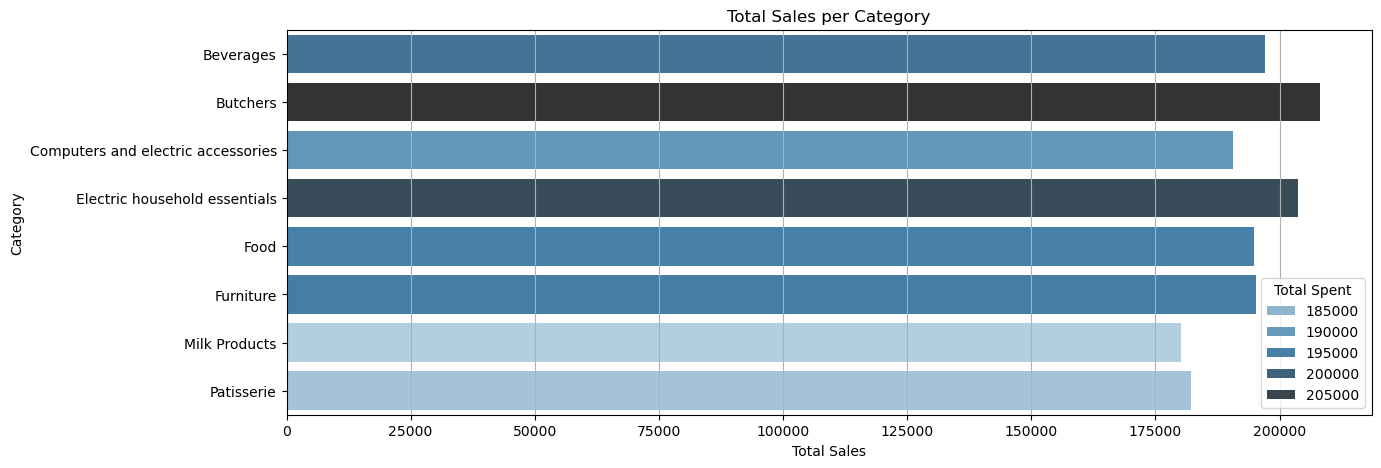

In [8]:
category_sales = visual_data.groupby("Category")["Total Spent"].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.barplot(data=category_sales, x="Total Spent", y="Category", hue="Total Spent", palette="Blues_d")
plt.title("Total Sales per Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.grid(axis="x")
plt.show()

 - the Butchers categorye has more sales than the others categories followed by Electric households essentials and Beverages

#### Contribution of each category to total revenue.

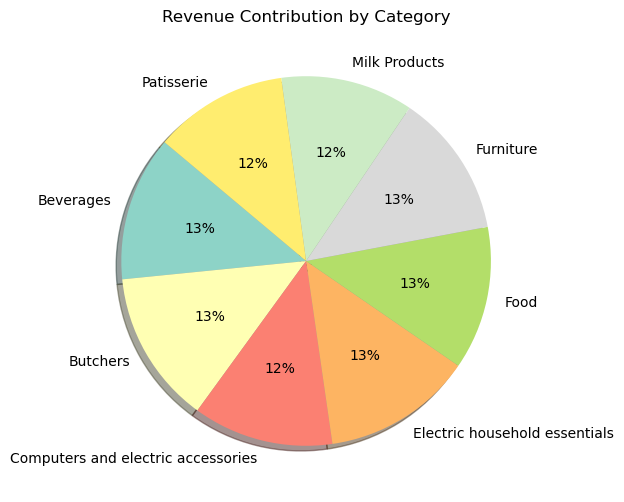

In [9]:
category_revenue = visual_data.groupby('Category')['Total Spent'].sum()

plt.figure(figsize=(8, 6))
category_revenue.plot.pie(autopct='%1.f%%', startangle=140, cmap='Set3', shadow=True)
plt.title('Revenue Contribution by Category')
plt.ylabel('')  
plt.show()

- Butchers contirbutes about 13.58 % in the whole sales which is just slightly above the Electric household essentials, food, furniture and bervages

#### Comparing Online vs. In-Store Sales

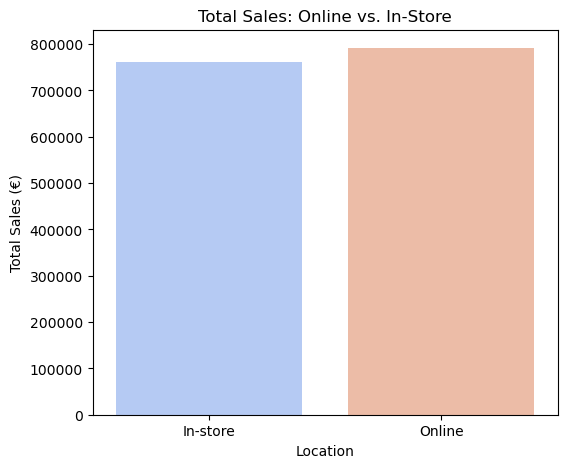

In [10]:
visual_data["Transaction Date"] = pd.to_datetime(visual_data["Transaction Date"])

location_sales = visual_data.groupby("Location")["Total Spent"].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x="Location", y="Total Spent", data=location_sales, hue='Location', palette="coolwarm")

plt.xlabel("Location")
plt.ylabel("Total Sales (€)")
plt.title("Total Sales: Online vs. In-Store")

plt.show()

- Overall products are solder on online slightly more than in-store

#### Monthly Sales Trend for Online vs. In-Store

<Figure size 1400x600 with 0 Axes>

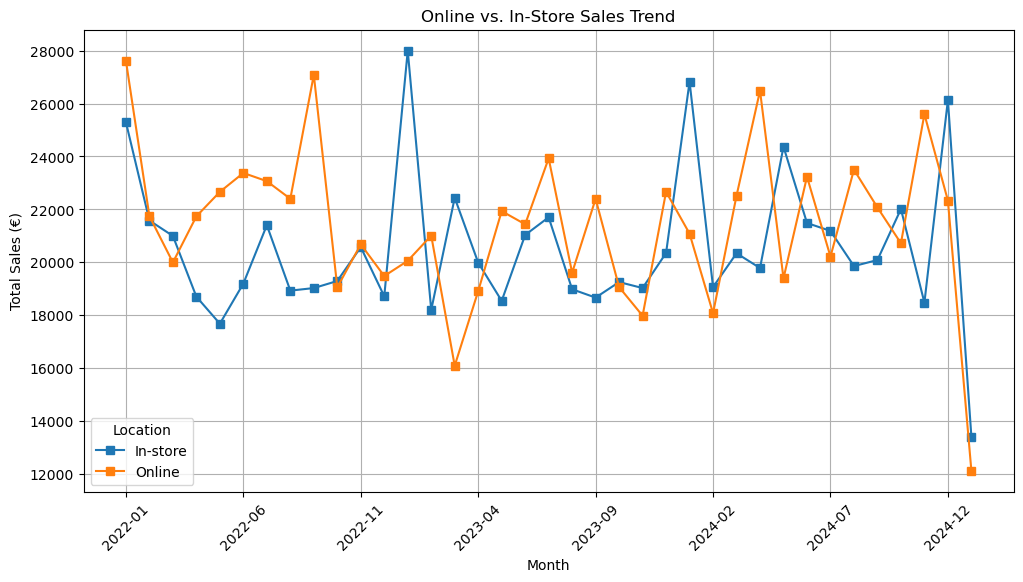

In [11]:
monthly_sales = visual_data.groupby([visual_data["Transaction Date"].dt.strftime("%Y-%m"), "Location"])["Total Spent"].sum().unstack()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind="line", marker="s", linestyle="-", figsize=(12, 6))

plt.xlabel("Month")
plt.ylabel("Total Sales (€)")
plt.title("Online vs. In-Store Sales Trend")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid()

plt.show()

#### Transactions per Month

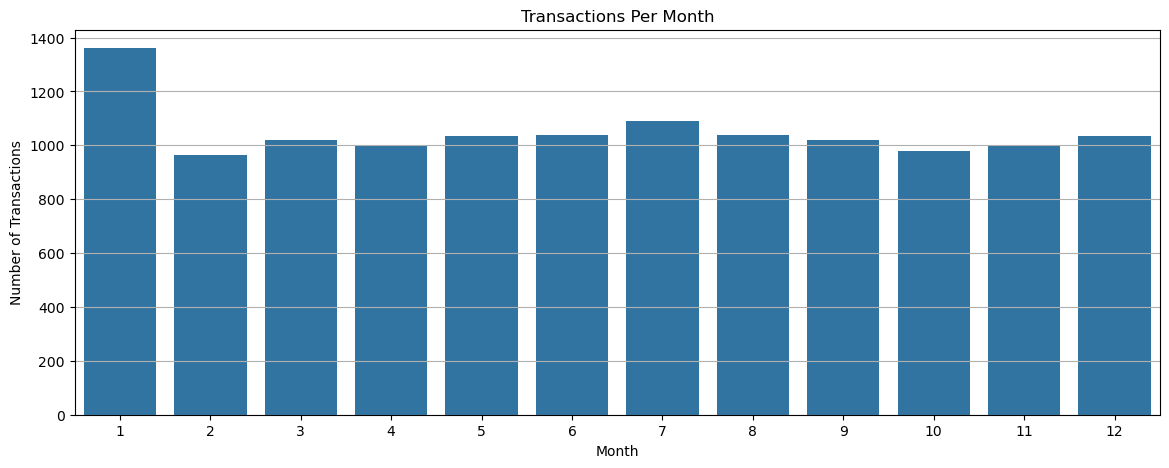

In [12]:
monthly_transactions = visual_data.groupby("Month")["Transaction ID"].count().reset_index()

plt.figure(figsize=(14, 5))
sns.barplot(data=monthly_transactions, x="Month", y="Transaction ID")
plt.title("Transactions Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(axis="y")
plt.show()

- January show more revenue than the other months

##### Percentage distribution of transactions by Category

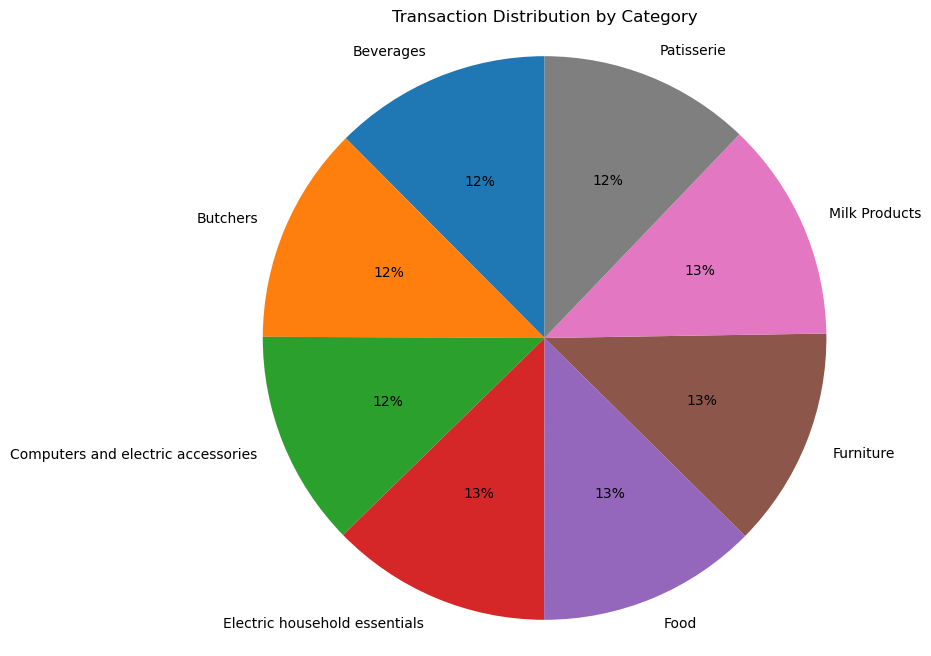

In [13]:

category_transactions = visual_data.groupby("Category")["Transaction ID"].count().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(category_transactions["Transaction ID"], labels=category_transactions["Category"], autopct='%1.f%%', startangle=90)
plt.title("Transaction Distribution by Category")
plt.axis('equal')
plt.show()



#### Customer Spending Behavior
##### Distribution of Total Spent

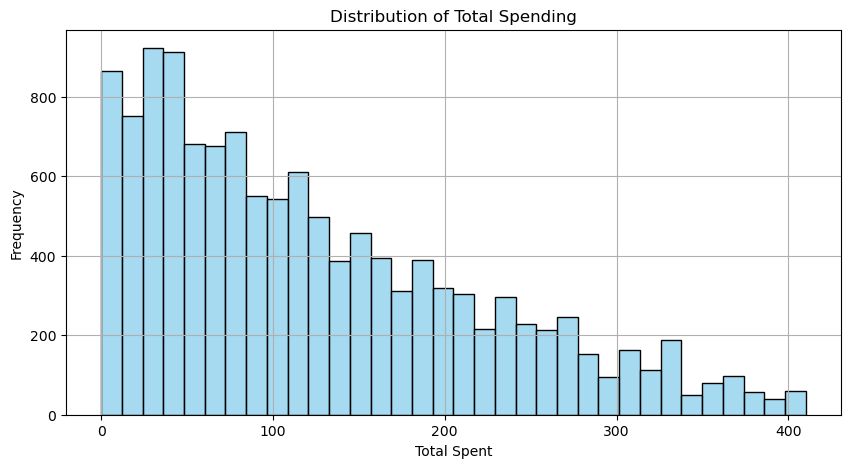

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(visual_data["Total Spent"], color="skyblue")
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Location & Payment Method Insights
##### Online vs In-store Purchases

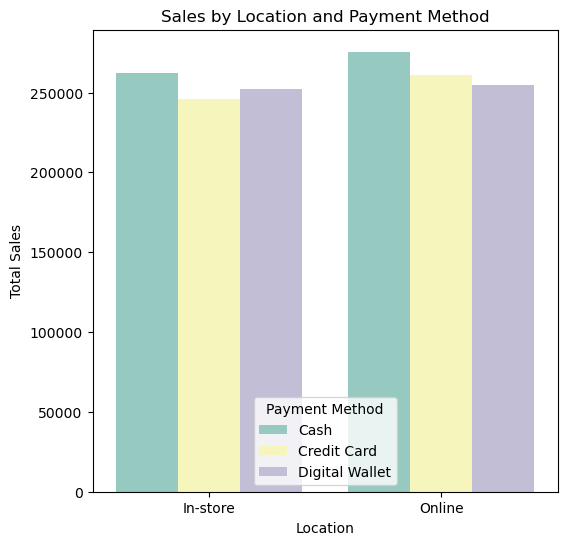

In [15]:
location_sales = visual_data.groupby(["Location", "Payment Method"])["Total Spent"].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=location_sales, x="Location", y="Total Spent", hue="Payment Method", palette="Set3")
plt.title("Sales by Location and Payment Method")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.show()

- Online purchase have more cash payments method followed by credit card then Digital Wallet

#### Discount Impact Analysis
##### Bar Chart: Total Spent with/without Discount

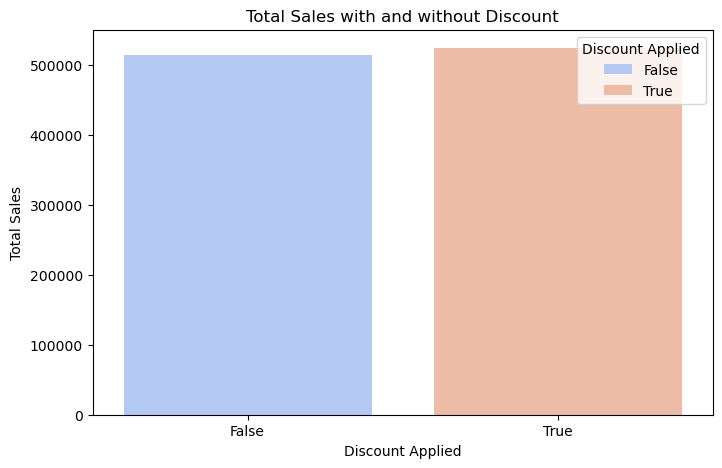

In [16]:
discount_sales = visual_data.groupby("Discount Applied")["Total Spent"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=discount_sales, x="Discount Applied", y="Total Spent", hue="Discount Applied" , palette="coolwarm")
plt.title("Total Sales with and without Discount")
plt.xlabel("Discount Applied")
plt.ylabel("Total Sales")
plt.xticks([0, 1], ['False', 'True'])
plt.show()

- for this data set the discount is not applied at all, so it has no influence in the total revenue
- however we can see overall we have more discount purchases.

#### Analyze Transaction Trends Over Time

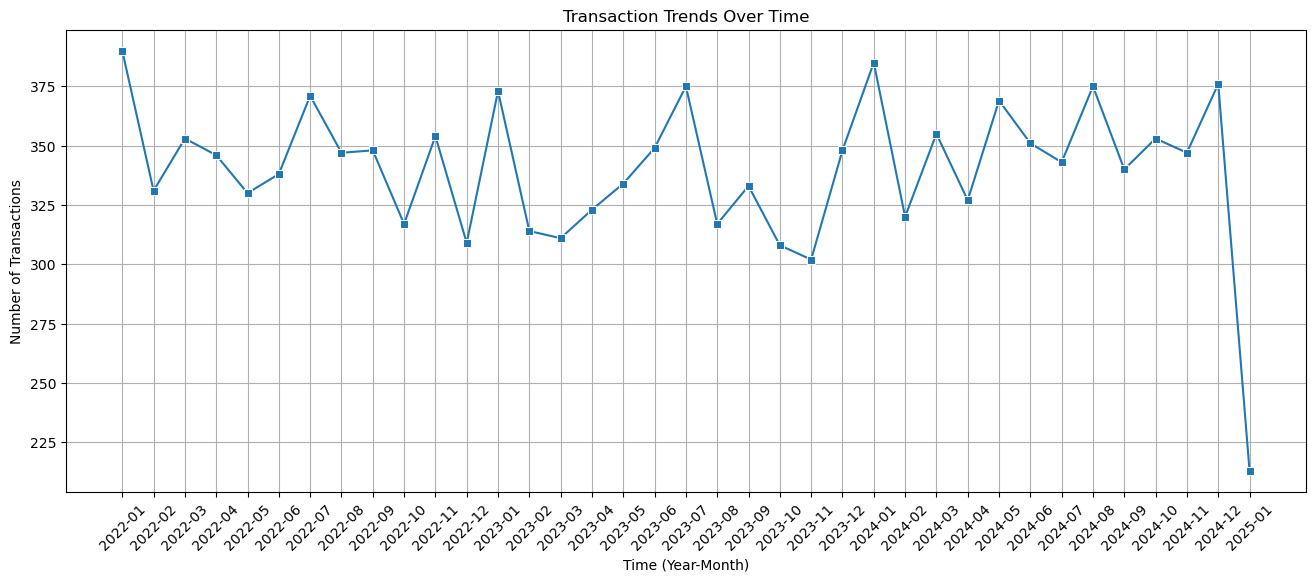

In [17]:
transactions_over_time = visual_data.groupby('Year-Month').size().reset_index(name='Transaction Count')

transactions_over_time['Year-Month'] = transactions_over_time['Year-Month'].astype(str)

plt.figure(figsize=(16, 6))
sns.lineplot(data=transactions_over_time, x='Year-Month', y='Transaction Count', marker='s')
plt.title("Transaction Trends Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Price Distribution of items

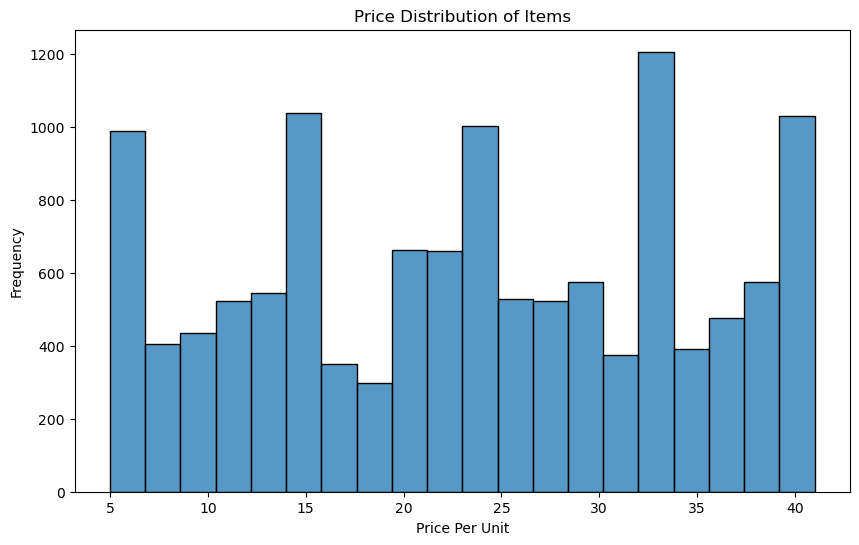

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(visual_data['Price Per Unit'], bins=20)
plt.title("Price Distribution of Items")
plt.xlabel("Price Per Unit")
plt.ylabel("Frequency")
plt.show()

Frequency of transcations vs Total Spending

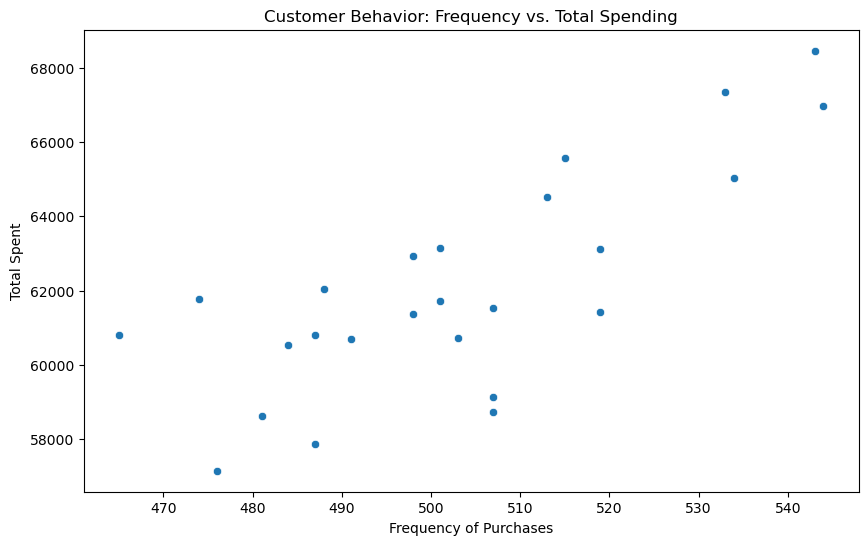

In [19]:
customer_behavior = visual_data.groupby('Customer ID').agg(
    Total_Spent=('Total Spent', 'sum'),
    Frequency=('Transaction ID', 'count')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behavior, x='Frequency', y='Total_Spent')
plt.title("Customer Behavior: Frequency vs. Total Spending")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Spent")
plt.show()

#### Calculate CLV

In [20]:
clv = visual_data.groupby('Customer ID')['Total Spent'].sum().reset_index()
clv.columns = ['Customer ID', 'CLV']

print(clv.sort_values(by='CLV', ascending=False).head(10))

   Customer ID      CLV
23     CUST_24  68452.0
7      CUST_08  67351.5
4      CUST_05  66974.5
15     CUST_16  65570.5
12     CUST_13  65037.0
22     CUST_23  64507.0
9      CUST_10  63155.5
14     CUST_15  63117.5
20     CUST_21  62933.0
1      CUST_02  62046.5


Top 10 customers by customer Lifetime Value(CLV)

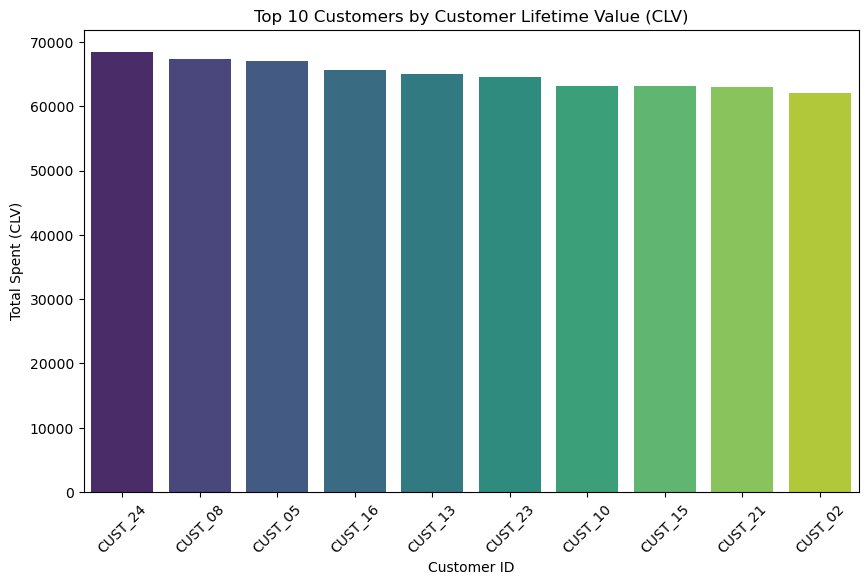

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


top_customers = clv.sort_values(by='CLV', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Customer ID', y='CLV', hue='Customer ID',palette='viridis')
plt.title('Top 10 Customers by Customer Lifetime Value (CLV)')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent (CLV)')
plt.xticks(rotation=45)
plt.show()

In [22]:
top_items = visual_data.groupby('Item')['Total Spent'].sum().reset_index()

print(top_items.sort_values(by='Total Spent', ascending=False).head(10))

             Item  Total Spent
200       Unknown      79072.5
133   Item_25_FUR      25256.0
131   Item_25_EHE      23083.0
129   Item_25_BUT      21894.0
125   Item_24_FUR      21172.0
132  Item_25_FOOD      20541.0
105   Item_22_BUT      19710.0
113   Item_23_BUT      19114.0
89    Item_20_BUT      18860.5
78   Item_19_MILK      18848.0


Top 10 items by total spent

/tmp/ipykernel_65287/2499177747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items_sorted, x='Item', y='Total Spent', palette='magma')


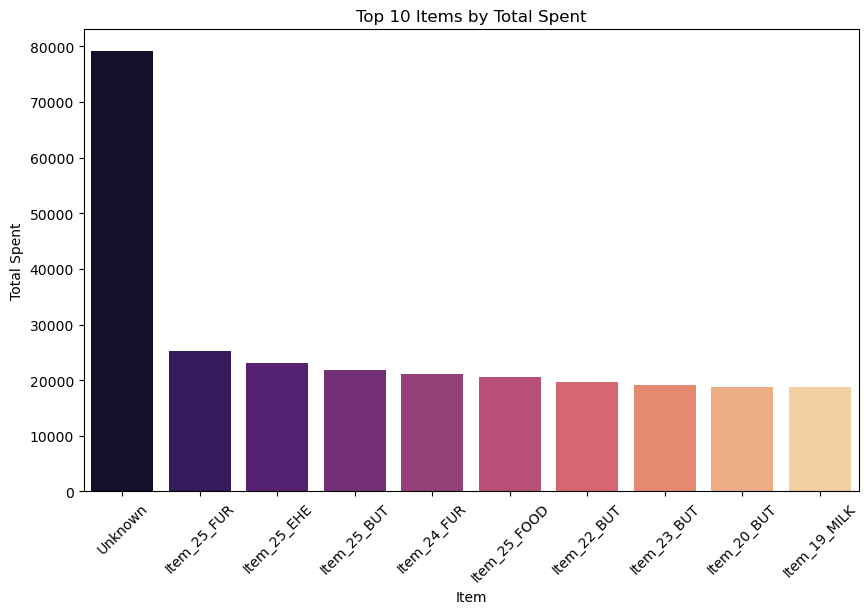

In [23]:
# Sort by Total Spent and get top 10 items
top_items_sorted = top_items.sort_values(by='Total Spent', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_items_sorted, x='Item', y='Total Spent', palette='magma')
plt.title('Top 10 Items by Total Spent')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

- the item which give more revenu are item 24_fur, 25_EHE, 25_BUT, 24_FUR, so no

Transactions per Category 

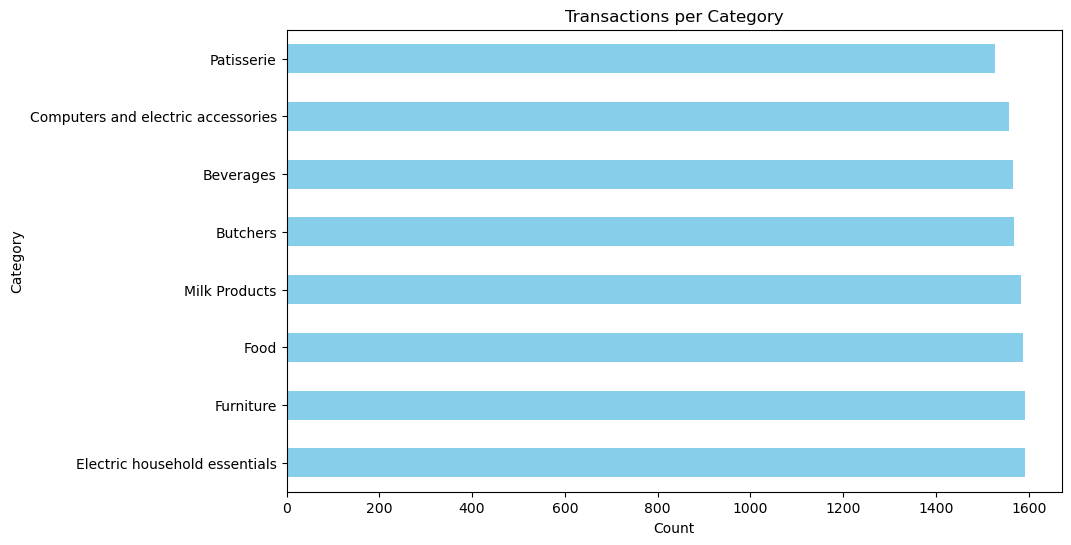

In [24]:
plt.figure(figsize=(10, 6))
category_count = visual_data['Category'].value_counts()
category_count.plot(kind='barh', color='skyblue')  
plt.title('Transactions per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


Unique Items Sold per Category 

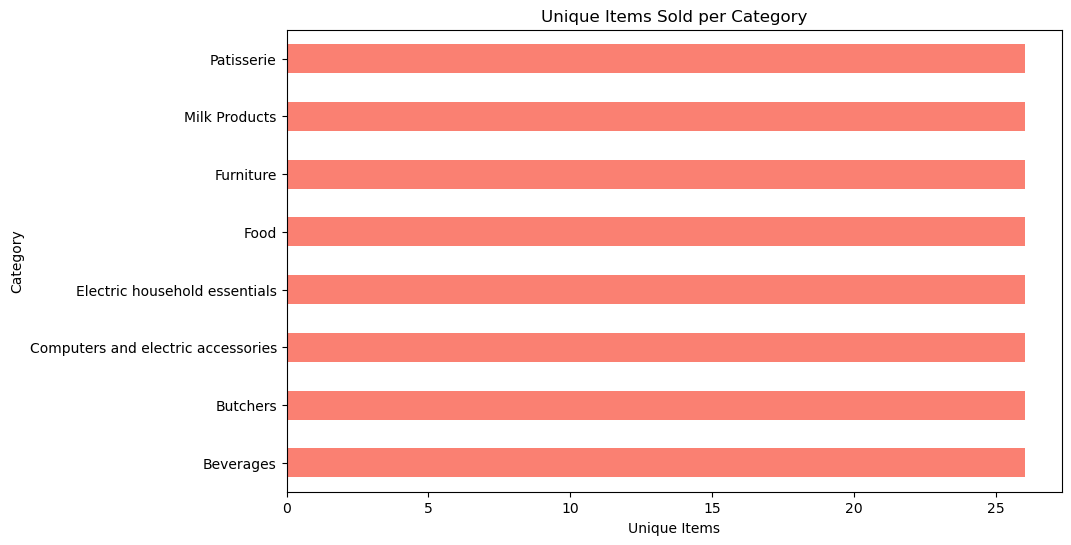

In [25]:
plt.figure(figsize=(10, 6))
item_count = visual_data.groupby('Category')['Item'].nunique()
item_count.plot(kind='barh', color='salmon')  
plt.title('Unique Items Sold per Category')
plt.xlabel('Unique Items')
plt.ylabel('Category')
plt.show()


Price Distribution per Category

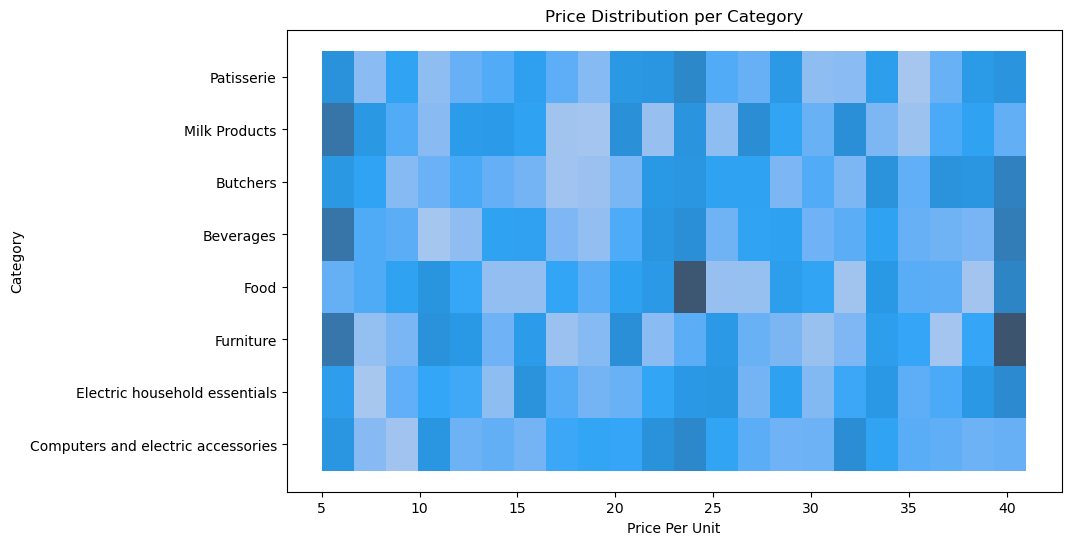

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=visual_data, y='Category', x='Price Per Unit')  # Swap x and y for boxplot
plt.title('Price Distribution per Category')
plt.xlabel('Price Per Unit')
plt.ylabel('Category')
plt.show()


### Customer Analysis
#### Number of purchases per customer

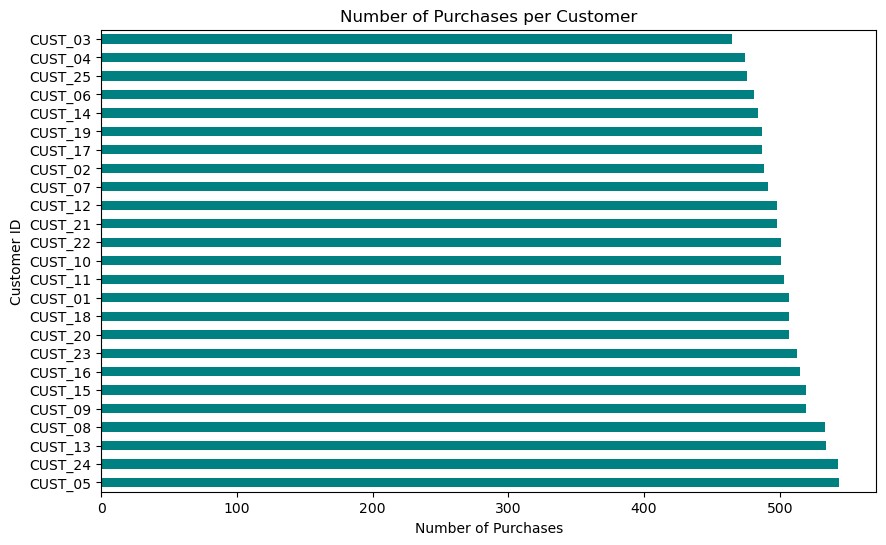

In [27]:
plt.figure(figsize=(10,6))
customer_purchases = visual_data['Customer ID'].value_counts()
customer_purchases.plot(kind='barh', color='teal')
plt.title('Number of Purchases per Customer')
plt.ylabel('Customer ID')
plt.xlabel('Number of Purchases')
plt.show()


#### Distribution of spending per customer (Box Plot)

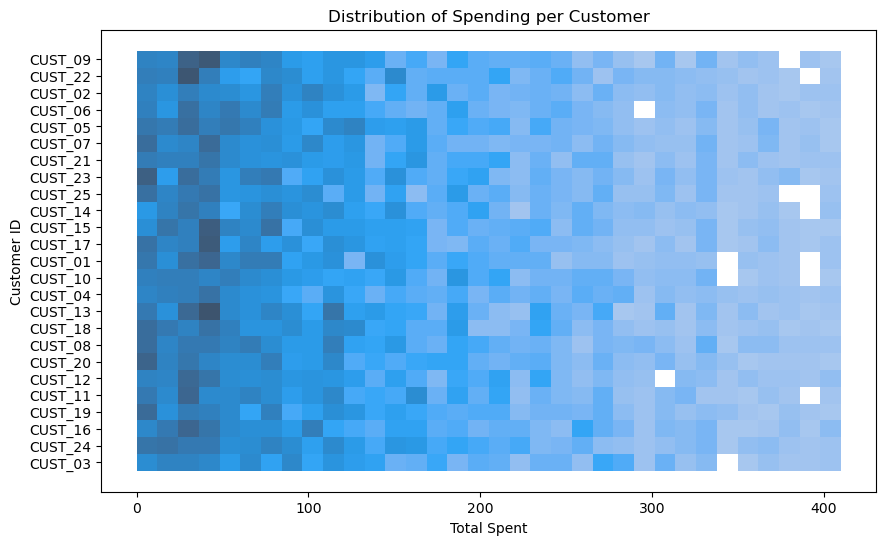

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=visual_data, y='Customer ID', x='Total Spent')
plt.title('Distribution of Spending per Customer')
plt.ylabel('Customer ID')
plt.xlabel('Total Spent')
# plt.xticks(rotation=90)
plt.show()


Distribution of Payment Methods (Pie Chart)

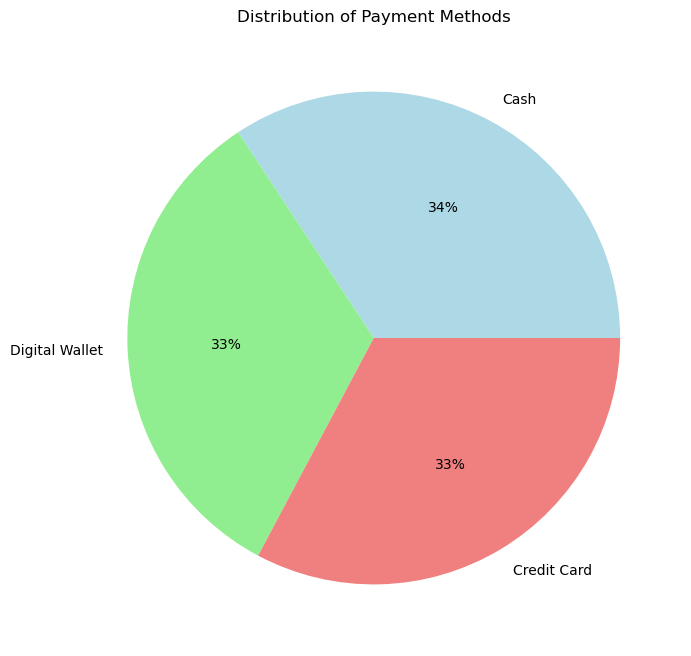

In [29]:
plt.figure(figsize=(8,8))
payment_method_count = visual_data['Payment Method'].value_counts()
payment_method_count.plot(kind='pie', autopct='%1.f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()
